In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
df=pd.read_csv("C:\\Users\\Sahil\\Downloads\\supply_chain_data.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [6]:
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864


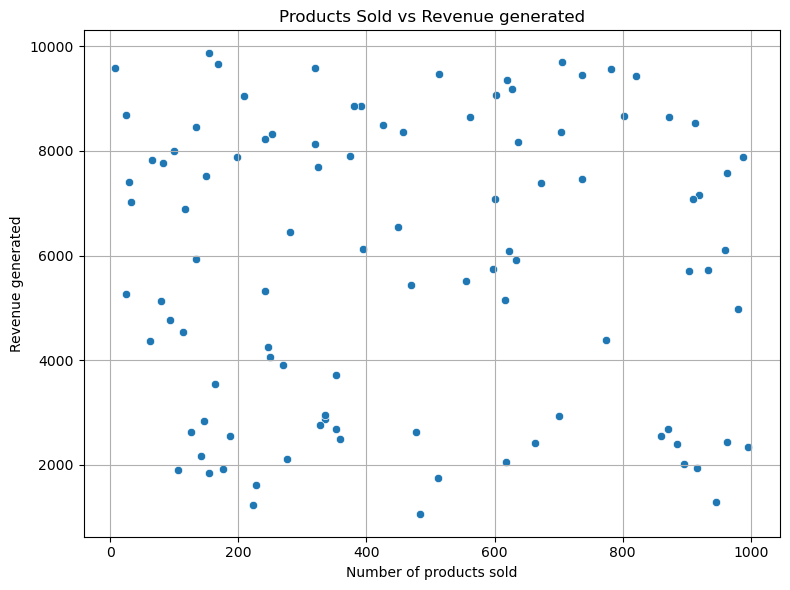

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Number of products sold'], y=df['Revenue generated'])  # replace with actual column names
plt.title('Products Sold vs Revenue generated')
plt.xlabel('Number of products sold')
plt.ylabel('Revenue generated')
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
import statsmodels.api as sm

In [15]:
# Group by product and calculate total sales and profit
product_summary = df.groupby('Product type').agg({'Number of products sold': 'sum', 'Revenue generated': 'sum'}).reset_index()

# Sort to find top-performing products (by sales or profit)
top_sales = product_summary.sort_values(by='Number of products sold', ascending=False).head(10)
top_profit = product_summary.sort_values(by='Revenue generated', ascending=False).head(10)

# Sort to find underperforming products (by low or negative profit)
low_profit = product_summary.sort_values(by='Revenue generated').head(10)

print("Top 10 Products by revenue:")
print(top_sales)


Top 10 Products by revenue:
  Product type  Number of products sold  Revenue generated
2     skincare                    20731      241628.162133
1     haircare                    13611      174455.390605
0    cosmetics                    11757      161521.265999


In [17]:
top_revenue = df[['SKU', 'Revenue generated']].sort_values(by='Revenue generated', ascending=False).head(5)
top_revenue


,SKU,Revenue generated
51,SKU51,9866.465458
38,SKU38,9692.318040
31,SKU31,9655.135103
90,SKU90,9592.633570
2,SKU2,9577.749626


In [20]:
correlation_price_sold = df['Price'].corr(df['Number of products sold'])
correlation_price_sold

0.005739484396580593

In [22]:
high_defect_suppliers = df[df['Defect rates'] > 3][['Supplier name', 'Defect rates']]
high_defect_suppliers

,Supplier name,Defect rates
1,Supplier 3,4.854068
2,Supplier 1,4.580593
3,Supplier 5,4.746649
4,Supplier 1,3.145580
9,Supplier 2,3.844614
19,Supplier 4,3.646451
20,Supplier 1,4.231417
24,Supplier 2,3.691310
25,Supplier 4,3.797231
29,Supplier 1,3.878099


In [24]:
lead_time_stats = df['Lead time'].describe()
lead_time_stats

count    100.000000
mean      17.080000
std        8.846251
min        1.000000
25%       10.000000
50%       18.000000
75%       25.000000
max       30.000000
Name: Lead time, dtype: float64

C:\Users\Sahil\AppData\Local\Temp\ipykernel_17804\4176440204.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5_revenue, x='SKU', y='Revenue generated', palette='Blues_d')


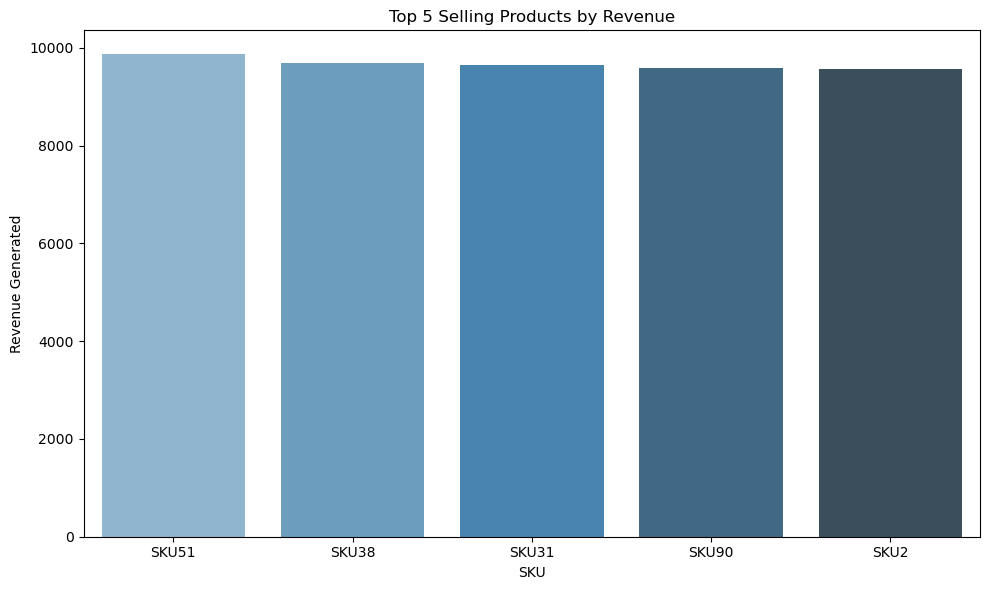

In [26]:
plt.figure(figsize=(10, 6))
top_5_revenue = df[['SKU', 'Revenue generated']].sort_values(by='Revenue generated', ascending=False).head(5)
sns.barplot(data=top_5_revenue, x='SKU', y='Revenue generated', palette='Blues_d')
plt.title('Top 5 Selling Products by Revenue')
plt.ylabel('Revenue Generated')
plt.xlabel('SKU')
plt.tight_layout()
plt.show()

C:\Users\Sahil\AppData\Local\Temp\ipykernel_17804\3475551719.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price, x='Product type', y='Price', palette='Set2')


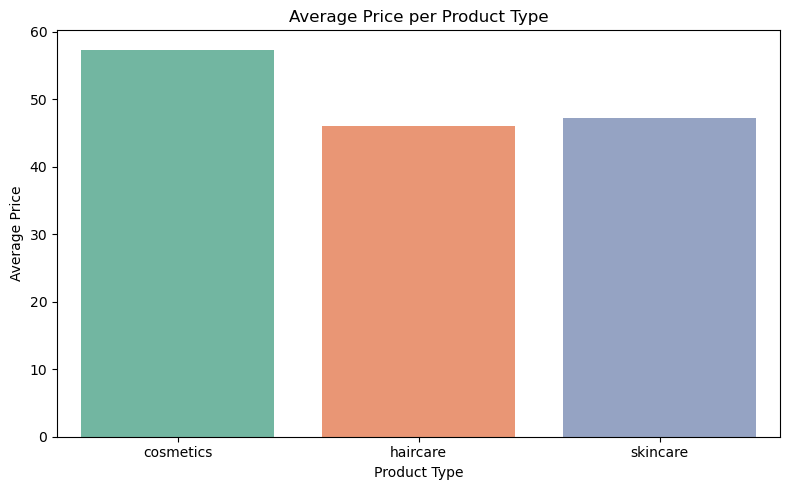

In [28]:
plt.figure(figsize=(8, 5))
avg_price = df.groupby('Product type')['Price'].mean().reset_index()
sns.barplot(data=avg_price, x='Product type', y='Price', palette='Set2')
plt.title('Average Price per Product Type')
plt.ylabel('Average Price')
plt.xlabel('Product Type')
plt.tight_layout()
plt.show()

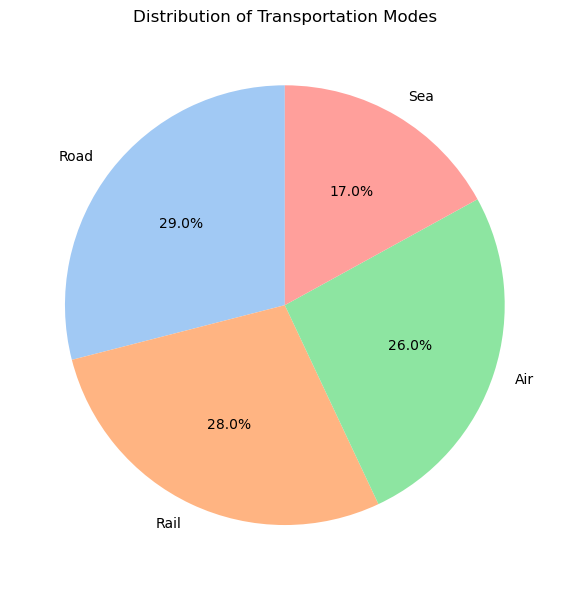

In [30]:
plt.figure(figsize=(6, 6))
transport_counts = df['Transportation modes'].value_counts()
transport_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Transportation Modes')
plt.ylabel('')
plt.tight_layout()
plt.show()

C:\Users\Sahil\AppData\Local\Temp\ipykernel_17804\3579939925.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top3_locations, x='Location', y='Production volumes', palette='viridis')


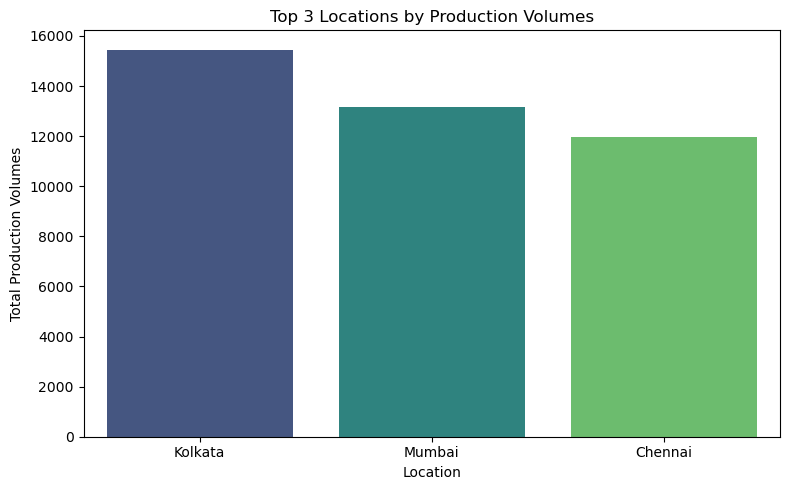

In [32]:
plt.figure(figsize=(8, 5))
top3_locations = df.groupby('Location')['Production volumes'].sum().sort_values(ascending=False).head(3).reset_index()
sns.barplot(data=top3_locations, x='Location', y='Production volumes', palette='viridis')
plt.title('Top 3 Locations by Production Volumes')
plt.ylabel('Total Production Volumes')
plt.xlabel('Location')
plt.tight_layout()
plt.show()